# Requirements

In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [7]:
# Add as many imports as you need.

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [3]:
data = pd.read_csv("obesity.csv")

Explore the dataset using visualizations of your choice.

In [54]:
data.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,Public_Transportation,Obesity_Type_III
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,no,2.027584,NaN,Automobile,Normal_Weight
2,0,18.000000,1.700150,50.165754,2.445041,1.411685,no,2.027584,0.866045,Public_Transportation,Insufficient_Weight
3,2,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,Public_Transportation,Obesity_Type_III
4,1,31.641081,1.914186,87.905350,2.445041,1.971472,no,2.027584,1.967973,Public_Transportation,Overweight_Level_II


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          16634 non-null  object 
 1   Age             20758 non-null  float64
 2   Height          20758 non-null  float64
 3   Weight          20758 non-null  float64
 4   FCVC            20758 non-null  float64
 5   NCP             20758 non-null  float64
 6   SMOKE           20758 non-null  object 
 7   CH2O            20758 non-null  float64
 8   FAF             16619 non-null  float64
 9   MTRANS          20758 non-null  object 
 10  NObeyesdad      20758 non-null  object 
 11  Gender_Encoded  20758 non-null  int32  
dtypes: float64(7), int32(1), object(4)
memory usage: 1.8+ MB


<Axes: >

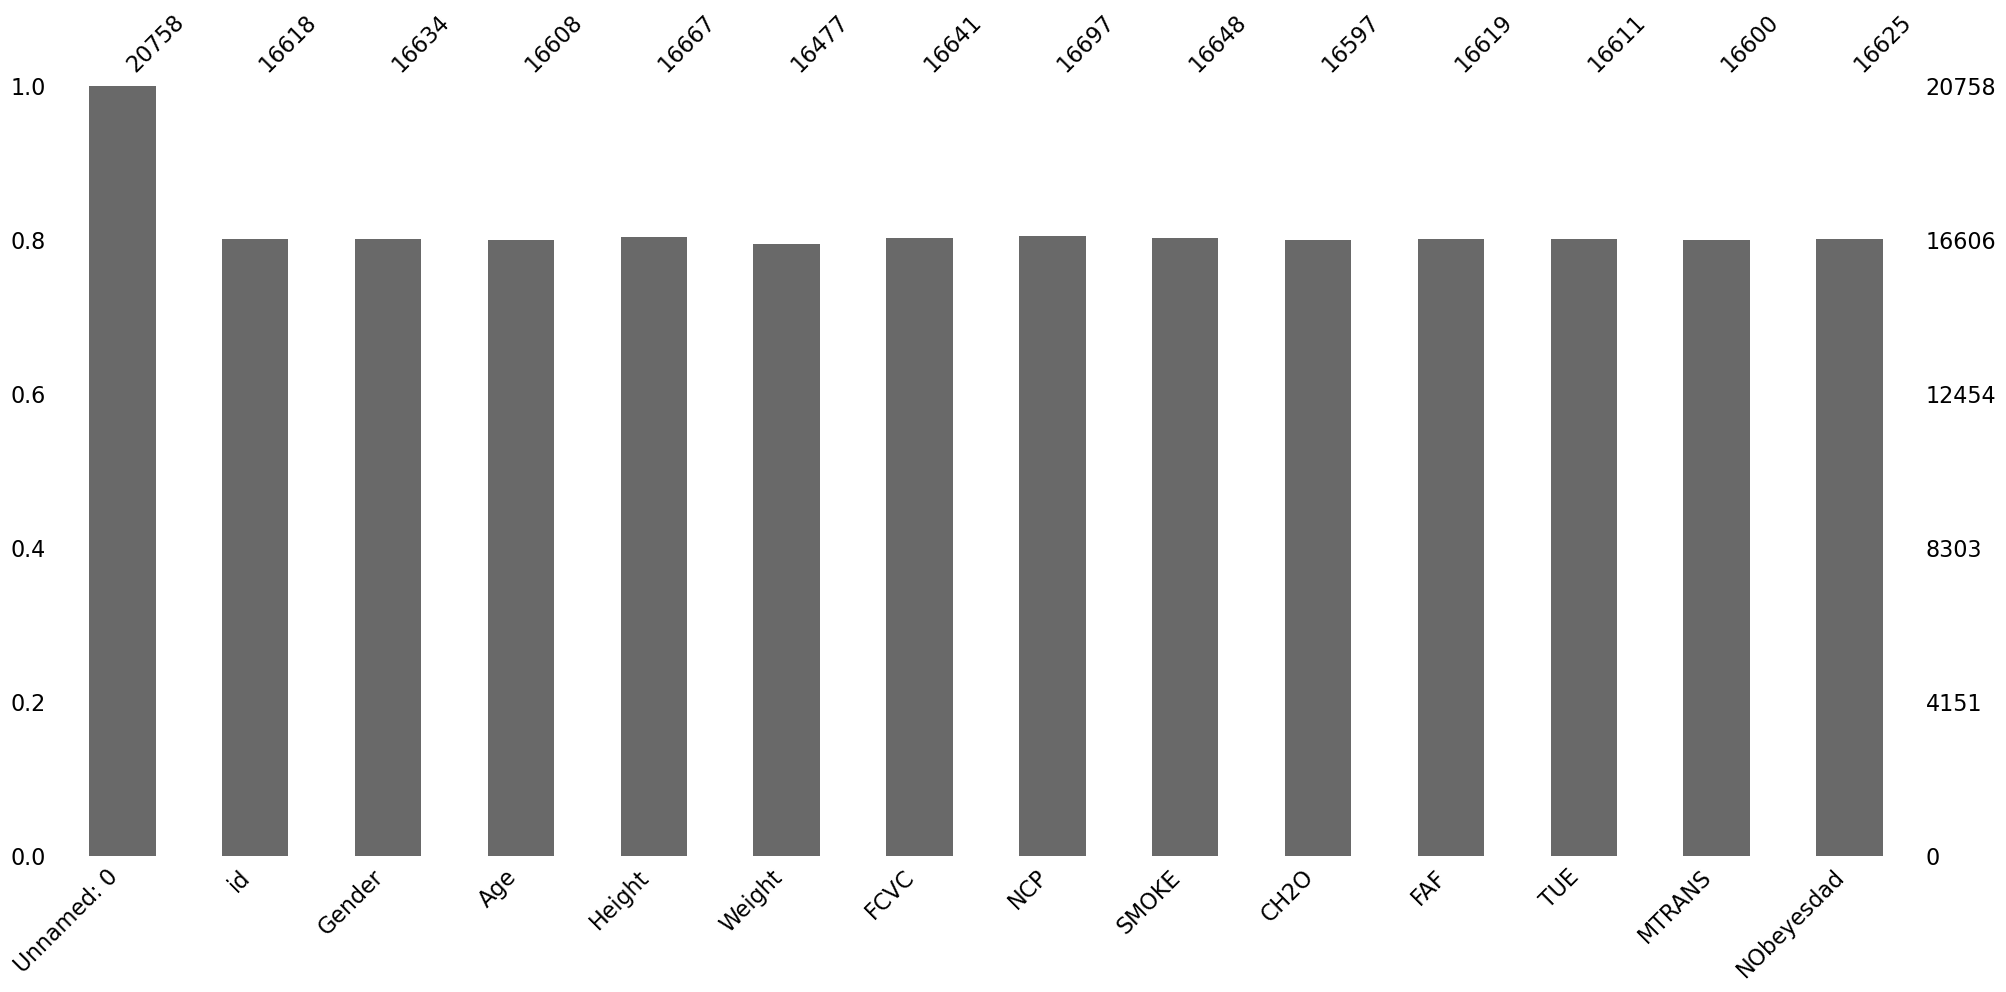

In [9]:
msno.bar(data)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

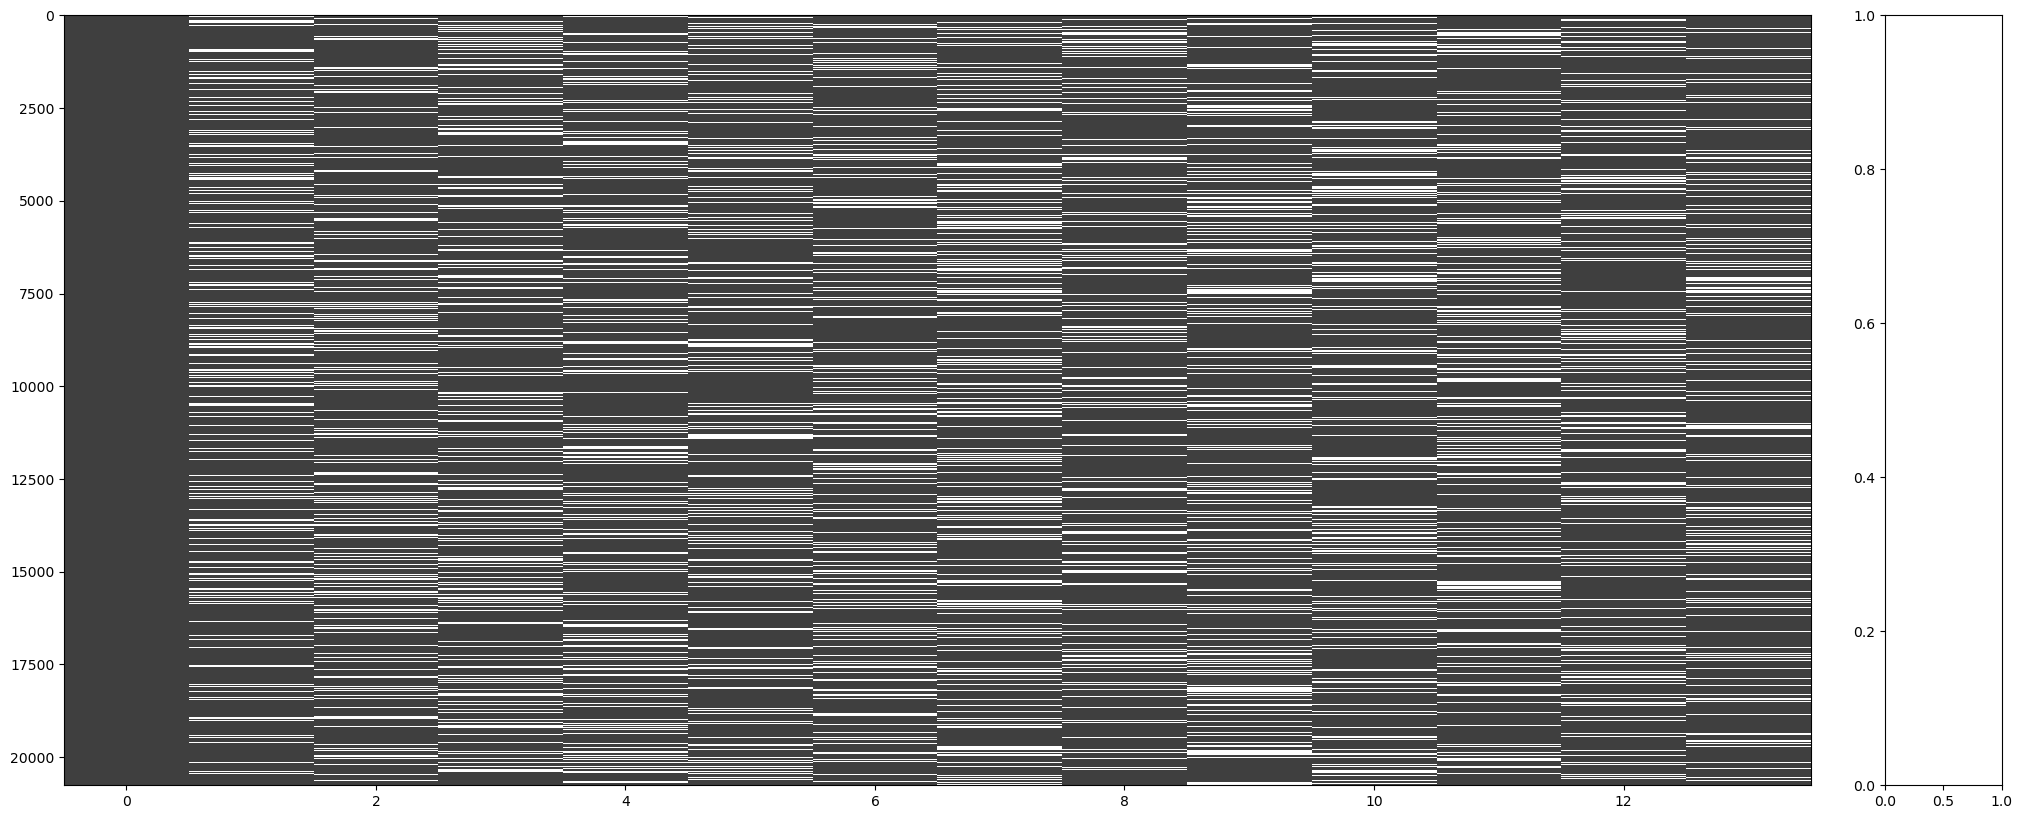

In [11]:
msno.matrix(data)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

<Axes: >

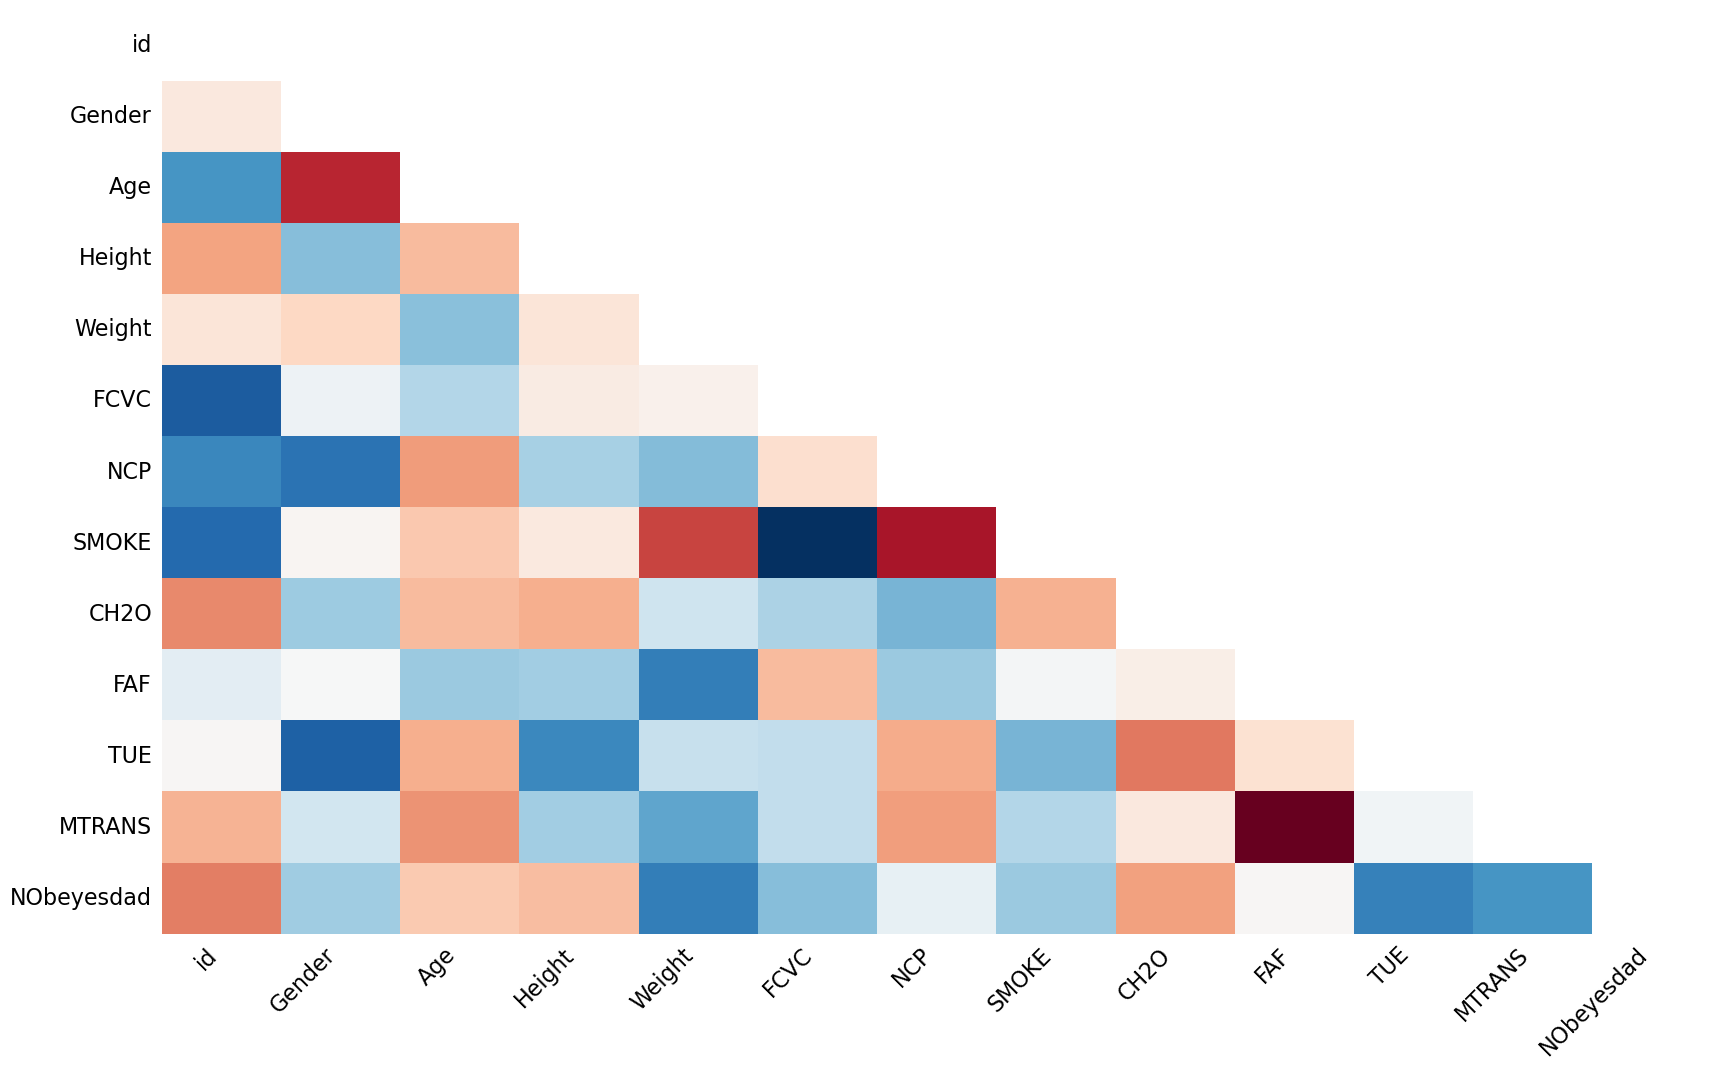

In [16]:
msno.heatmap(data)

In [44]:
data.isnull().sum()

Gender            4124
Age                  0
Height               0
Weight               0
FCVC                 0
NCP                  0
SMOKE                0
CH2O                 0
FAF               4139
MTRANS               0
NObeyesdad           0
Gender_Encoded       0
dtype: int64

In [70]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent

Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
FCVC          0.0
NCP           0.0
SMOKE         0.0
CH2O          0.0
FAF           0.0
MTRANS        0.0
NObeyesdad    0.0
dtype: float64

In [64]:
data = data.drop(columns='HomePlanet_Enc')

In [19]:
data = data.drop(columns='id')

In [21]:
data = data.drop(columns='TUE')

In [23]:
data['SMOKE'].fillna(data['SMOKE'].mode()[0], inplace=True)
data['MTRANS'].fillna(data['MTRANS'].mode()[0], inplace=True)
data['NObeyesdad'].fillna(data['NObeyesdad'].mode()[0], inplace=True)

In [25]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Height'].fillna(data['Height'].mean(), inplace=True)
data['Weight'].fillna(data['Weight'].mean(), inplace=True)

In [27]:
data['CH2O'].fillna(data['CH2O'].mean(), inplace=True)
data['NCP'].fillna(data['NCP'].mean(), inplace=True)
data['FCVC'].fillna(data['FCVC'].mean(), inplace=True)

In [56]:
data['FAF'].fillna(data['FAF'].mean(), inplace=True)

In [37]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'].astype(str))

In [69]:
data.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,3,4
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.027584,0.975865,0,1
2,0,18.000000,1.700150,50.165754,2.445041,1.411685,0,2.027584,0.866045,3,0
3,2,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,3,4
4,1,31.641081,1.914186,87.905350,2.445041,1.971472,0,2.027584,1.967973,3,6


In [62]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['SMOKE'])
data['SMOKE'] = encoded_values

In [68]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['NObeyesdad'])
data['NObeyesdad'] = encoded_values

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [ ]:
# Write your code here. Add as many boxes as you need.

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [80]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['FAF'], test_size=0.2)

In [83]:
model = XGBRegressor(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, learning_rate=0.16)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.445885410340843e-05


# Cross-validation evaluation

In [88]:
y = data.FAF
X = data.drop(['FAF'], axis=1).select_dtypes(exclude=['object'])

In [91]:
from xgboost import cv, DMatrix


data_dmatrix = DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [92]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.736564,0.001013,0.736921,0.002174
1,0.727011,0.001007,0.727742,0.002188
2,0.720517,0.001018,0.721502,0.002210
3,0.718270,0.001003,0.719340,0.002098
4,0.716424,0.000992,0.717580,0.002012


Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [93]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.655638
Name: test-rmse-mean, dtype: float64


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.